In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./data/pomdp_data.csv')
#data = pd.read_csv('./data/all_data.csv')

data00 = data

In [14]:
# filtering data with specific action
data00 = data[data['location']==0]
data00

,box1 state,box2 state,box1 belief,box2 belief,action,reward,location,box1 color,box2 color
2,0.0,1.0,0.334975,0.663704,2.0,0.0,0.0,2.0,2.0
4,1.0,1.0,0.331813,0.912682,3.0,0.0,0.0,2.0,1.0
7,0.0,1.0,-0.010653,0.653722,2.0,0.0,0.0,4.0,2.0
10,1.0,1.0,0.334975,0.663704,0.0,0.0,0.0,2.0,2.0
11,1.0,1.0,0.115143,0.911013,3.0,0.0,0.0,3.0,1.0
15,1.0,0.0,0.339896,0.309386,1.0,0.0,0.0,2.0,4.0
16,1.0,0.0,0.589482,0.436513,0.0,0.0,0.0,1.0,3.0
17,0.0,0.0,0.115143,0.911013,3.0,0.0,0.0,3.0,1.0
21,0.0,1.0,0.587115,0.667192,0.0,0.0,0.0,1.0,2.0
22,1.0,1.0,0.115566,1.075390,3.0,0.0,0.0,3.0,0.0


In [5]:
data0 = data00[data00['action']==0]
d0 = data0[['box1 belief','box2 belief']]


In [6]:
data1 = data00[data00['action']==1]
d1 = data1[['box1 belief','box2 belief']]

data2 = data00[data00['action']==2]
d2 = data2[['box1 belief','box2 belief']]

data3 = data00[data00['action']==3]
d3 = data3[['box1 belief','box2 belief']]

data4 = data00[data00['action']==4]
d4 = data4[['box1 belief','box2 belief']]

### results: still (82% cases) go to box 2(action=3) if belief for box 2 is bigger than box 1 --> it makes sense

In [7]:
d3 # belief that causes action 3 (go to box2)
d3.shape[0]

8507

In [8]:
np.sum(d3['box2 belief']>= d3['box1 belief'])/d3.shape[0]

0.8520042318090983

### results: still (81% cases) go to box 1(action=2) even though belief for box 2 is bigger than box 1 --> weird!

In [9]:
d2 # belief that causes action 2 (go to box1) 
d2.shape[0]

8347

In [10]:
np.sum(d2['box2 belief']>= d2['box1 belief'])/d2.shape[0]

0.2037857913022643

In [11]:
x = np.linspace(0,1,num=11)
y = np.linspace(0,1,num=11)

Text(0.5, 1.0, 'distribution of belief when action 3(go to box 2) is chosen')

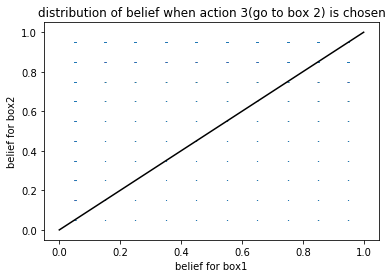

In [20]:
#plt.scatter(d0.to_numpy()[:,0],d0.to_numpy()[:,1],s=3,marker='^')
#plt.scatter(d1.to_numpy()[:,0],d1.to_numpy()[:,1],s=3,marker='v')
#plt.scatter(d2.to_numpy()[:,0],d2.to_numpy()[:,1],s=3,marker='o')# action1: go to box1
plt.scatter(d3.to_numpy()[:,0],d3.to_numpy()[:,1],s=0.005,marker='<') # action3: go to box2
#plt.scatter(d4.to_numpy()[:,0],d4.to_numpy()[:,1],s=3,marker='x') #action 4: push button
plt.plot(x,y,c='k')
plt.xlabel('belief for box1')
plt.ylabel('belief for box2')
plt.title('distribution of belief when action 3(go to box 2) is chosen')

Text(0.5, 1.0, 'distribution of belief when action 2(go to box 1) is chosen')

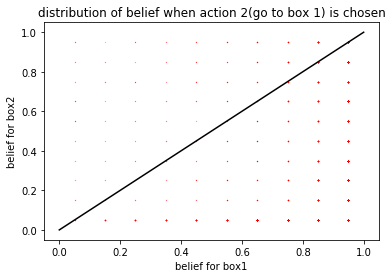

In [19]:
plt.scatter(d2.to_numpy()[:,0],d2.to_numpy()[:,1],s=0.0005,marker='o',c='r')# action2: go to box1
plt.plot(x,y,c='k')
plt.xlabel('belief for box1')
plt.ylabel('belief for box2')
plt.title('distribution of belief when action 2(go to box 1) is chosen')